In [ ]:
#The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
#The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



#Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



#Attribute Information:

#The explanations of sensor measurements and their brief statistics are given below.

#Variable (Abbr.) Unit Min Max Mean
#Ambient temperature (AT) C â€“6.23 37.10 17.71
#Ambient pressure (AP) mbar 985.85 1036.56 1013.07
#Ambient humidity (AH) (%) 24.08 100.20 77.87
#Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
#Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
#Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
#Turbine after temperature (TAT) C 511.04 550.61 546.16
#Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
#Turbine energy yield (TEY) MWH 100.02 179.50 133.51
#Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
#Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/gas_turbines.csv')

In [ ]:
# Extract features and target variable
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']]
y = df['TEY']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.510091267466172


In [ ]:
#  the trained model to make predictions on new data
# For example, if you have new ambient variable values:
new_data = [[20.0, 1000.0, 80.0, 4.0, 30.0, 1100.0, 550.0, 14.0]]
new_data_scaled = scaler.transform(new_data)
predicted_tey = model.predict(new_data_scaled)
print(f'Predicted TEY: {predicted_tey[0]} MWH')

Predicted TEY: 145.8065750537714 MWH


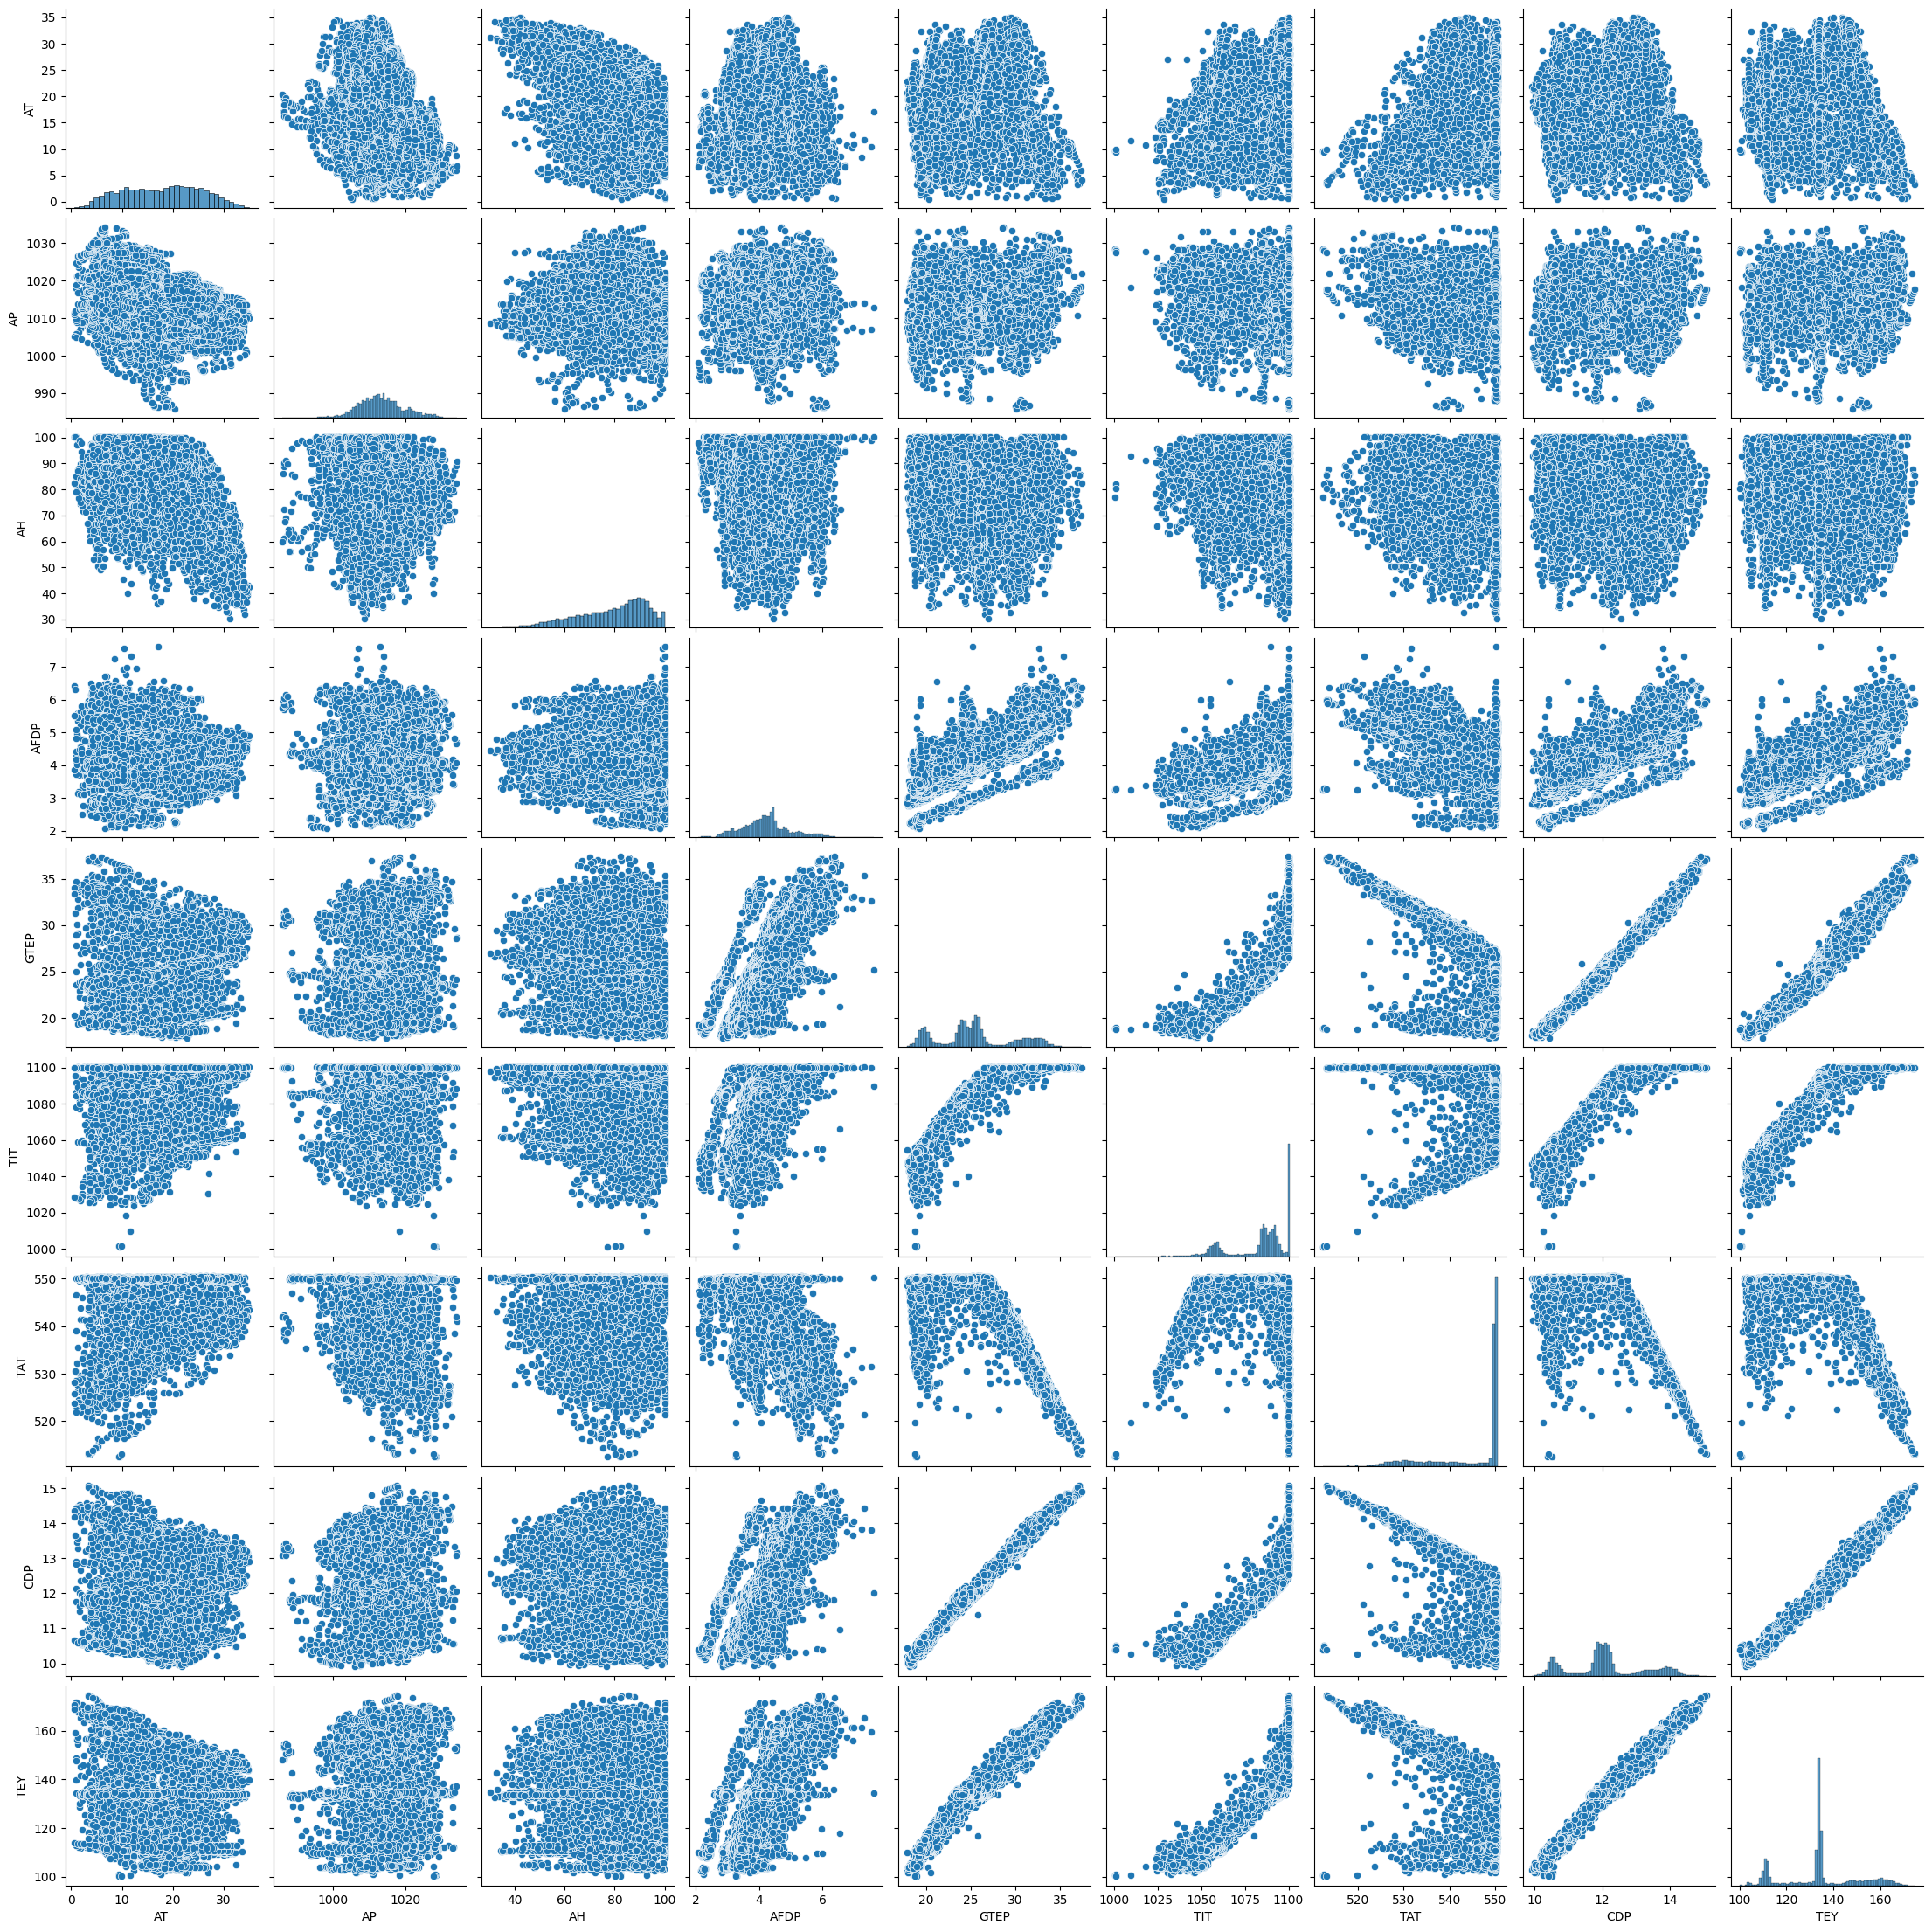

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']])
plt.show()

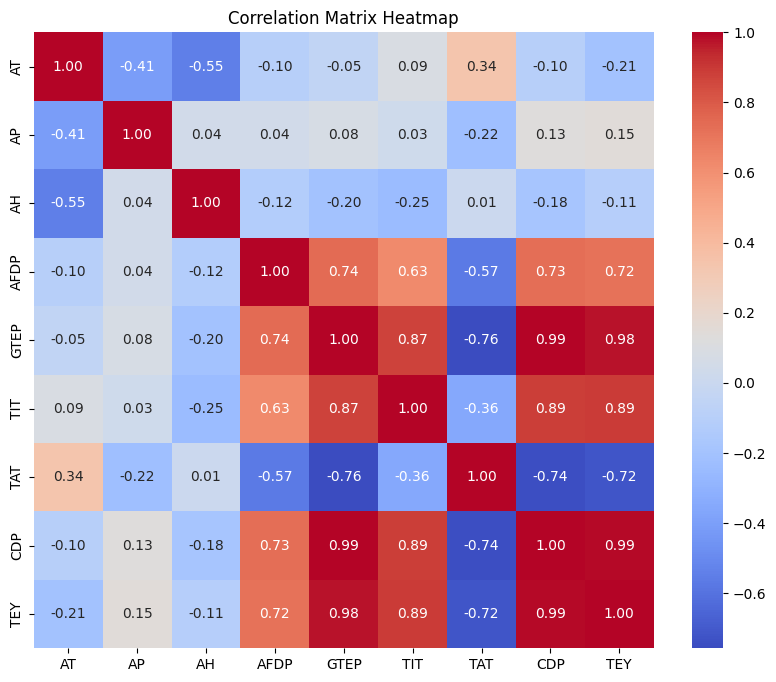

In [ ]:
# Correlation matrix heatmap
correlation_matrix = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

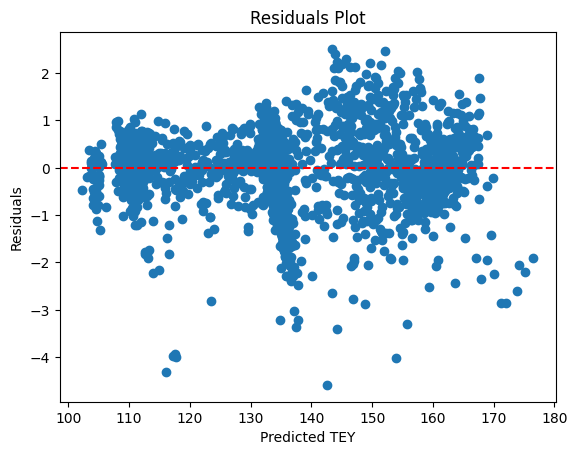

In [ ]:
# Residuals plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title("Residuals Plot")
plt.xlabel("Predicted TEY")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

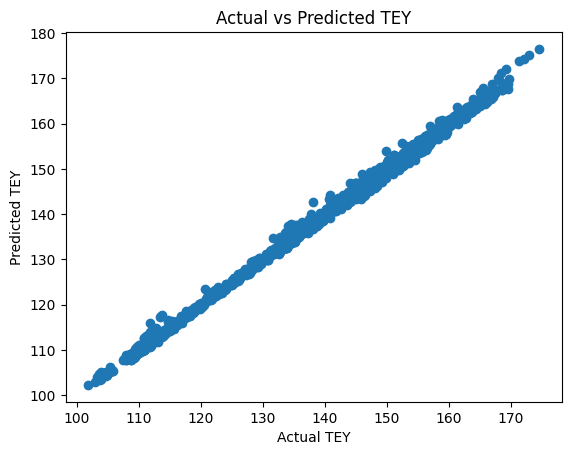

In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted TEY")
plt.xlabel("Actual TEY")
plt.ylabel("Predicted TEY")
plt.show()